In [6]:
# Problem statement:

# Some XYZ company is facing a high attrition rate, need to analyse the data to address the problems employees are
# facing so the rentention rate is improved

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("people.csv")
data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [4]:
# Last rows

data.tail()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low
14998,0.77,0.83,6,271,3,0,0,0,support,low


In [5]:
data.shape

(14999, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
data.isnull().sum()



satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [17]:
# Duplicate values

data.duplicated().sum()


3008

In [18]:
data[data.duplicated()]

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
263,0.46,0.57,2,139,3,0,1,0,sales,low
877,0.37,0.51,2,127,3,0,1,0,sales,medium
974,0.42,0.53,2,142,3,0,1,0,sales,low
1017,0.40,0.50,2,127,3,0,1,0,IT,low
1241,0.10,0.85,6,266,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14985,0.95,0.84,3,270,3,1,0,1,sales,medium
14987,0.37,0.45,2,126,3,0,1,0,support,medium
14988,0.43,0.57,2,157,3,0,1,0,sales,low
14993,0.61,0.89,3,242,10,0,0,0,sales,high


In [8]:
data = data.drop_duplicates()

In [9]:
data.shape

(11991, 10)

In [20]:
# Initail value - 14999
# Duplicates - 3008
# Remaining data shape

14999 - 3008

11991

In [27]:
# Statistical Summary of the data

data.describe()


,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [28]:
data['satisfactoryLevel'].mean()

0.6128335222348156

In [10]:
data.corr()

ValueError: could not convert string to float: 'sales'

<ipython-input-36-d4902ed392b1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

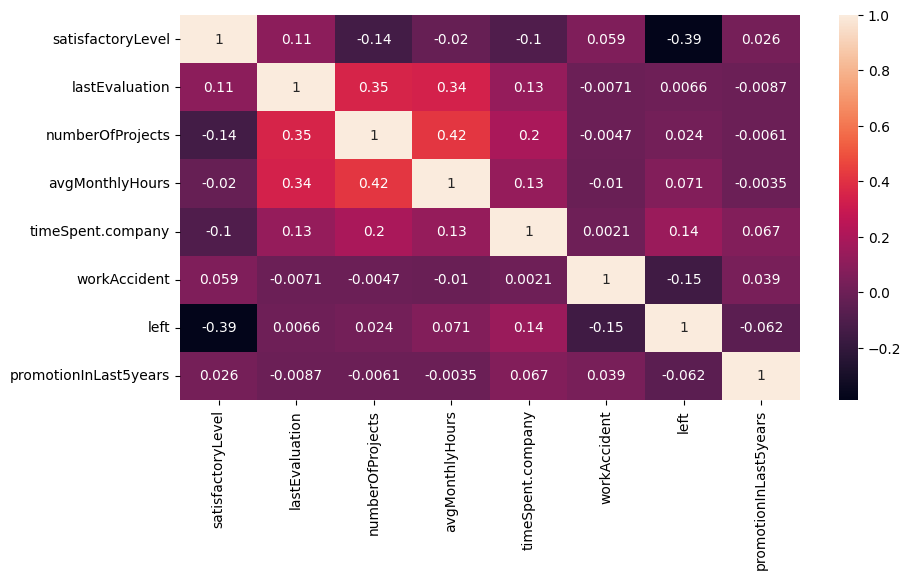

In [36]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True)

<ipython-input-40-0c466172d95a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap = "rainbow")


<Axes: >

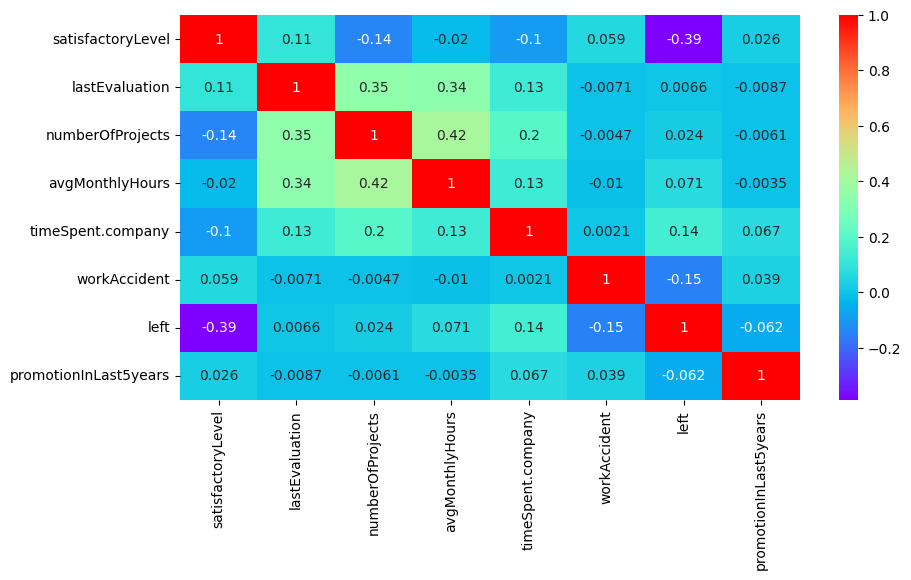

In [40]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True, cmap = "rainbow")

In [45]:
data.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

# Overall Attrition rate

In [52]:
len(data["left"]) # Employees i am having in total

11991

In [54]:
data["left"].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [55]:
# Attrition rate -- percentage of employee on notice period (left == 1)

(1991/11991) * 100

16.604119756484028

In [56]:
# Analysis :
# There is high attrition rate in the company i.e 16.6%

# work life balance based on number of project

In [57]:
data["numberOfProjects"].value_counts()

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: numberOfProjects, dtype: int64

In [58]:
# Analysis: Most employees have normal work load

<Axes: xlabel='numberOfProjects', ylabel='count'>

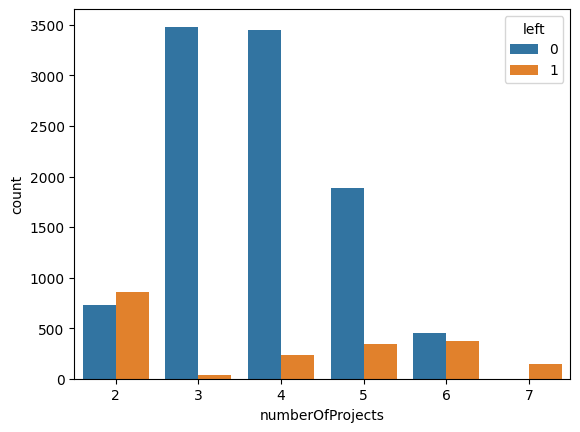

In [63]:
sns.countplot( x = "numberOfProjects", data = data , hue = "left")
--------####sns.countplot( x = "numberOfProjects", data = data)          without hue do once

In [12]:
#attrition rate of employees having less projects and those having more project

In [72]:
# Less projects

a = len(data[(data["numberOfProjects"] < 3) & (data["left"] == 1)])  # data is the name of dataframe which you can change according to you

# More projects

m = len(data[(data["numberOfProjects"] > 5) & (data["left"] == 1)])

# Normal Work load

n = len(data[(data["numberOfProjects"] >= 3) & (data["numberOfProjects"] <= 5) & (data["left"] == 1)])

In [70]:
b = len(data["left"] == 1)

In [73]:
# Attrition rate for employees having less number of projects

less_projects = (a/b) * 100
more_projects = (m/b) * 100
normal_projects = (n/b) * 100

print("less_projects attriton rate = ", less_projects)
print("more_projects attriton rate = ", more_projects)
print("normal_projects attriton rate = ", normal_projects)


less_projects attriton rate =  7.147026936869319
more_projects attriton rate =  4.303227420565424
normal_projects attriton rate =  5.1538653990492875


In [74]:
# Analysis:

# The employee having less project are the most leaving the company

# Conclusion :

# Give more opportunities to the employees

In [75]:
data.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

# Now let us check based on Work accident

<Axes: xlabel='workAccident', ylabel='count'>

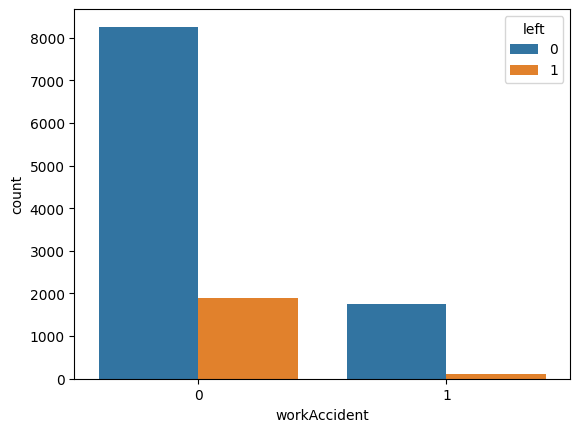

In [76]:
sns.countplot( x = "workAccident", data = data , hue = "left")

In [77]:
data["workAccident"].value_counts()

0    10141
1     1850
Name: workAccident, dtype: int64

In [81]:
# Attrition rate of employees having work accident

len(data[(data["workAccident"] == 1) & (data["left"] == 1)]) / len(data["left"] == 1) * 100

0.8756567425569177

In [82]:
# Attrition rate of employees having no work accident

len(data[(data["workAccident"] == 0) & (data["left"] == 1)]) / len(data["left"] == 1) * 100

15.728463013927113

In [83]:
# Analysis:

# Best employee are leaving the company more

# Conclusion:

# Try to fulfil the demands of good employees

In [84]:
data.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

# Lets check based on salaries

<Axes: xlabel='salary', ylabel='count'>

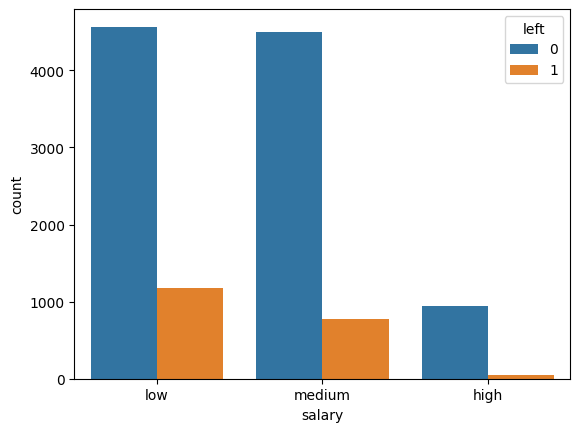

In [85]:
sns.countplot( x = "salary", data = data , hue = "left")

In [86]:
# Attrition Rate for low salary

len(data[(data["salary"] == "low") & (data["left"] == 1)]) / len(data["left"] == 1) * 100


9.790676340588774

In [87]:
# Attrition Rate for medium salary

len(data[(data["salary"] == "medium") & (data["left"] == 1)]) / len(data["left"] == 1) * 100

6.4131431907263785

In [88]:
# Attrition Rate for high salary

len(data[(data["salary"] == "high") & (data["left"] == 1)]) / len(data["left"] == 1) * 100

0.40030022516887664

In [90]:
# Analysis

# Employee having less salary are leaving more

# Conclusion:

# Increments, Incentives, Bonus

In [91]:
# Number of project, Work accident, Salary

In [92]:
# We want to check how many persons are working without any mistakes and have less salary
len(data[(data["salary"] == "low") & (data["workAccident"] == 0) & (data["left"] == 1)])

1117

In [95]:
# Attrition rate for above

len(data[(data["salary"] == "low") & (data["workAccident"] == 0) & (data["left"] == 1)])  / len(data["left"] == 1) * 100

9.315319823200733

In [97]:
# Conclusion : Focus more on these employees and fulfil their demand

# Department wise

<Axes: xlabel='dept', ylabel='count'>

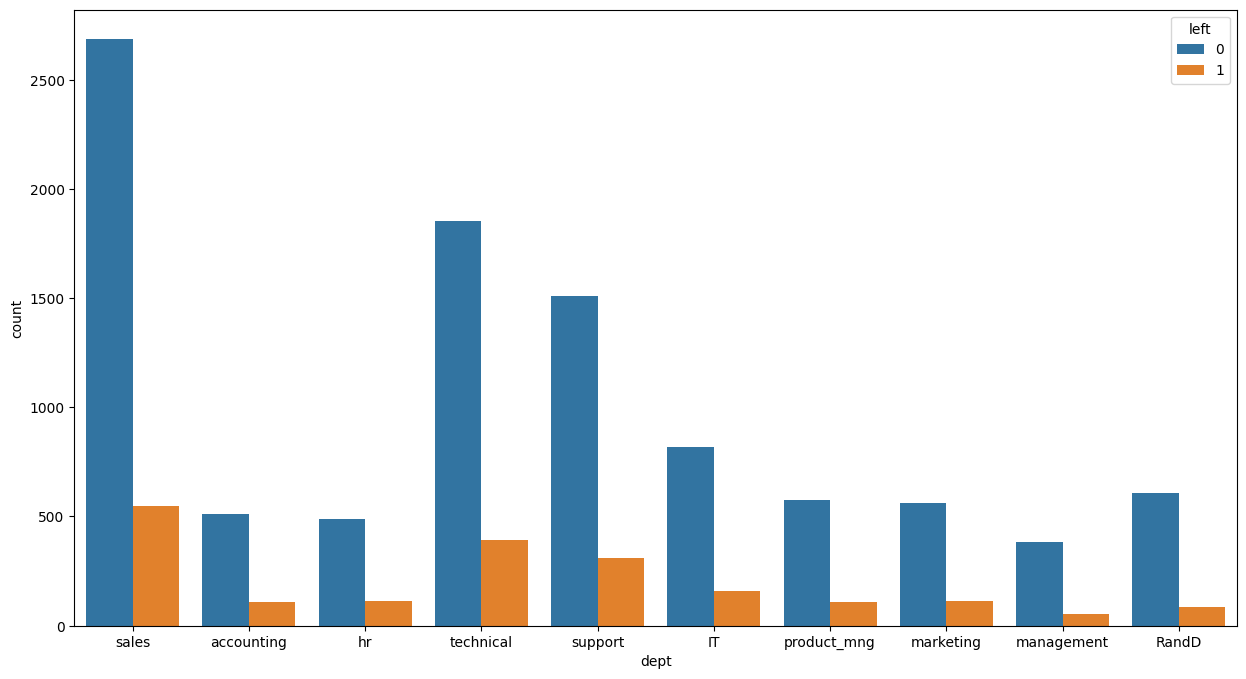

In [98]:
plt.figure(figsize=(15,8))

sns.countplot(data=data, x='dept', hue='left')

In [99]:
# Analysis : Sales, Technical, Support facing high attrition rate

In [101]:
# (), [], {}

# (data["salary"] == "low") & (data["workAccident"] == 0) & ( 3rd condition)

array(['low', 'medium', 'high'], dtype=object)

In [103]:
d = {
    "key 1" : 1,
    "key 2" : 2
}

In [104]:
d

{'key 1': 1, 'key 2': 2}

In [105]:
data["salary"]

0           low
1        medium
2        medium
3           low
4           low
          ...  
14992       low
14995       low
14996       low
14997       low
14998       low
Name: salary, Length: 11991, dtype: object